In [112]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math


In [113]:
img = cv2.imread("data_raw/image/20224869/20224869_Head facing forward_27.551719198255583_51.jpg")

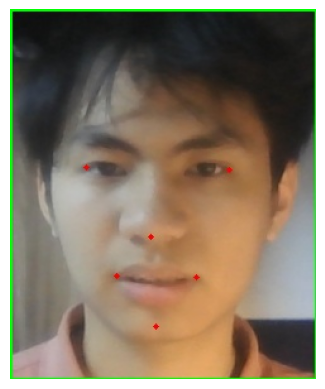

In [114]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img) # RGB

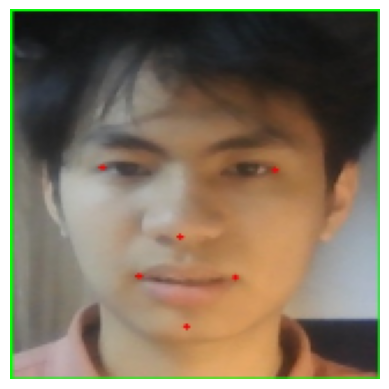

In [115]:
img = cv2.resize(img, (160, 160))
plt.axis('off')
plt.imshow(img)

In [116]:
class FaceLoading:
    def __init__(self,directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.y = []
    def extract_face(self,path):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        face = cv2.resize(img, self.target_size)
        return face
    def load_face_and_class(self):
        for sub_dir in os.listdir(self.directory):
            sub_dir_path = os.path.join(self.directory, sub_dir)
            for img_name in os.listdir(sub_dir_path):
                face = self.extract_face(os.path.join(sub_dir_path, img_name))
                self.X.append(face)
                self.y.append(sub_dir)
        return np.array(self.X), np.array(self.y)
    def plot_images(self):
        num_columns = 3
        num_rows = math.ceil(len(self.X) / num_columns)  # Ensure row count covers all images

        plt.figure(figsize=(num_columns * 3, num_rows * 3))  # Adjust figure size dynamically
        for num, img in enumerate(self.X):
            plt.subplot(num_rows, num_columns, num + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.tight_layout()  # Improve layout spacing
        plt.show()


In [117]:
face_loading = FaceLoading(r"C:\Users\admin\OneDrive - Hanoi University of Science and Technology\Documents\GitHub\PTTK\face_recognization\source\data_raw\image")
X,y = face_loading.load_face_and_class()

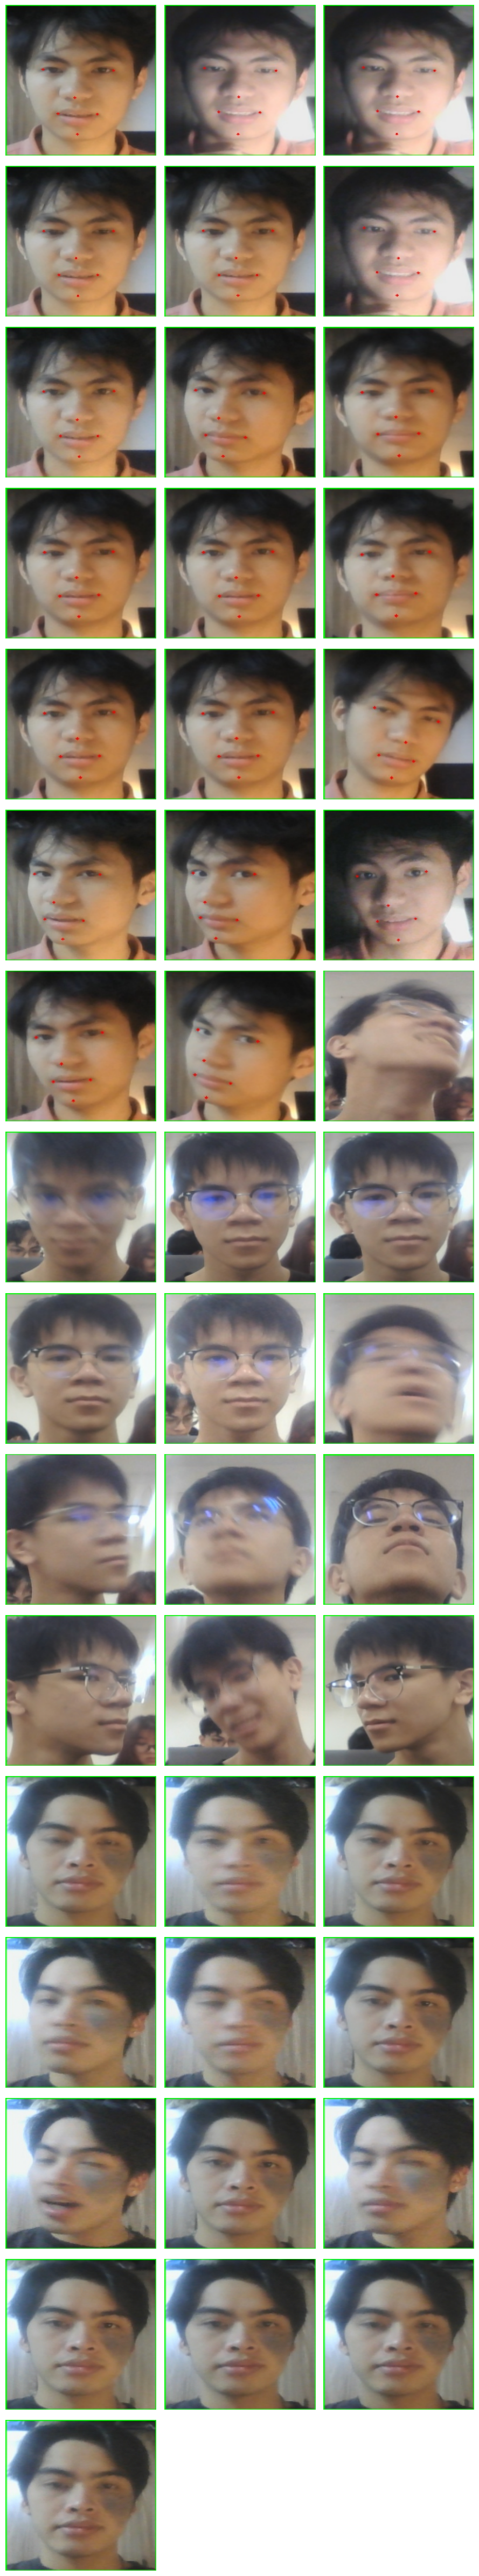

In [118]:
face_loading.plot_images()

In [119]:
len(y),print(y)

['20224869' '20224869' '20224869' '20224869' '20224869' '20224869'
 '20224869' '20224869' '20224869' '20224869' '20224869' '20224869'
 '20224869' '20224869' '20224869' '20224869' '20224869' '20224869'
 '20224869' '20224869' '20224981' '20224981' '20224981' '20224981'
 '20224981' '20224981' '20224981' '20224981' '20224981' '20224981'
 '20224981' '20224981' '20224981' '20228683' '20228683' '20228683'
 '20228683' '20228683' '20228683' '20228683' '20228683' '20228683'
 '20228683' '20228683' '20228683' '20228683']


(46, None)

In [120]:
from keras_facenet import FaceNet
embeder = FaceNet()

In [121]:
def get_embedding(face_img):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embeder.embeddings(face_img)
    return yhat[0]

In [122]:
EMBEDDED_X = []
for face in X:
    embedding = get_embedding(face)
    EMBEDDED_X.append(embedding)
EMBEDDED_X = np.array(EMBEDDED_X)



1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [123]:
from sklearn.preprocessing import LabelEncoder
encode =  LabelEncoder()
encoded_y = encode.fit_transform(y)

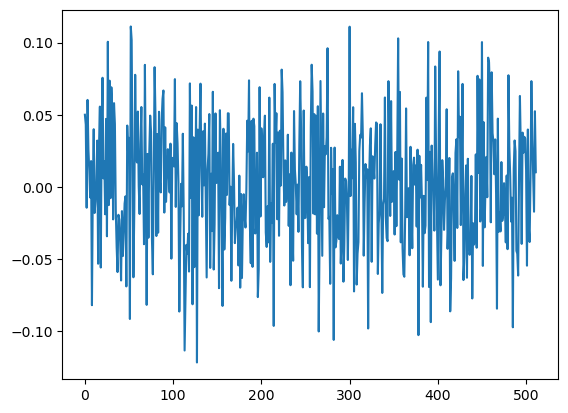

In [124]:
plt.plot(EMBEDDED_X[0])

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(EMBEDDED_X, encoded_y, test_size=0.2, random_state=42)

In [126]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [127]:
y_preds_test = model.predict(X_test)
print(y_preds_test)
y_preds_test.shape

[2 1 1 2 2 2 0 0 0 0]


(10,)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds_test)

1.0

In [129]:
print(accuracy_score)

<function accuracy_score at 0x00000299717B3240>


In [ ]:
col = 3
row = len(X_test)//col + 1
for i,face in enumerate(X_test):
    if
